**Work done by : *GOUMIRI sabria* and *IDRI aya***

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    precision_score, recall_score, classification_report,
    accuracy_score, f1_score, confusion_matrix
)
from matplotlib.colors import ListedColormap


nltk.download('punkt')      # Tokenization
nltk.download('stopwords')  # Stopwords
nltk.download('wordnet')    # Lemmatizer
nltk.download('omw-1.4')    # Multilingue (optionnel)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
data=pd.read_csv("/content/MyBalancedSpamClassificationDataset.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4482 entries, 0 to 4481
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4482 non-null   object
 1   Message  4482 non-null   object
dtypes: object(2)
memory usage: 70.2+ KB


<ipython-input-41-74e92b42dc31>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x=data["label"], palette=cols)


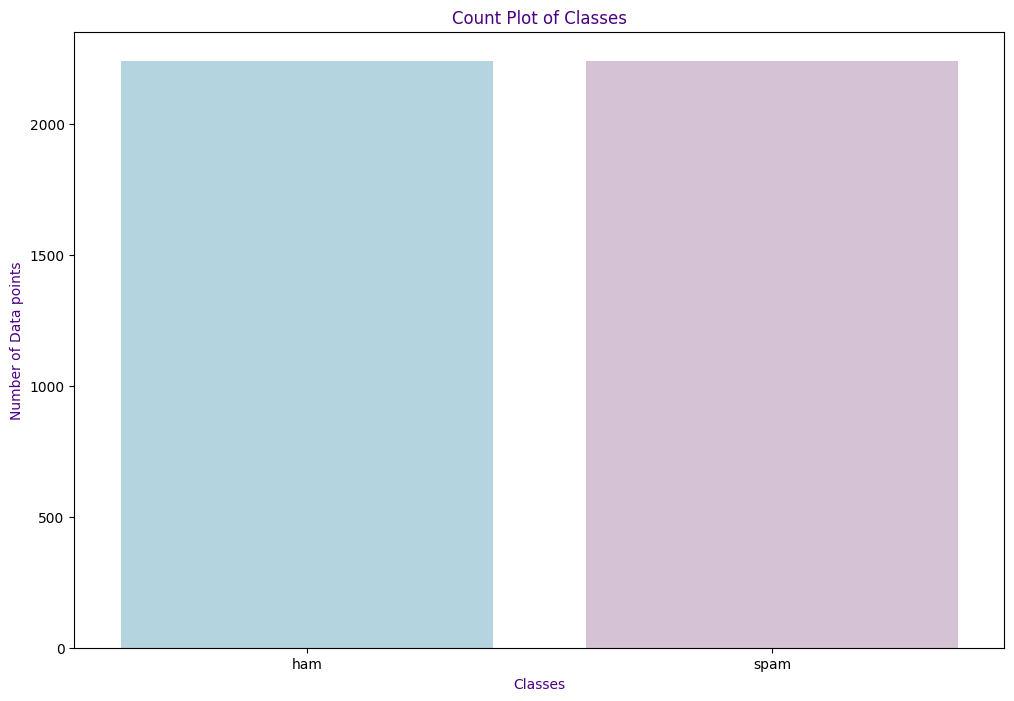

In [ ]:

cols = ["#ADD8E6", "#D8BFD8"]

plt.figure(figsize=(12, 8))
fg = sns.countplot(x=data["label"], palette=cols)
fg.set_title("Count Plot of Classes", color="#4B0082")
fg.set_xlabel("Classes", color="#4B0082")
fg.set_ylabel("Number of Data points", color="#4B0082")

plt.show()


**Note:** From the above countplot the data is 100% balanced.

<a id="3.1"></a>
# <p style="background-color:#D8BFD8;font-family:newtimeroman;color:#00008B;text-align:center;font-size:120%;border-radius:20px 60px;">FEATURE ENGINEERING</p>
For the purpose of data exploration, I am creating new features

* No_of_Characters: Number of characters in the text message
* No_of_Words: Number of words in the text message
* No_of_sentence: Number of sentences in the text message  

In [ ]:
#Adding a column of numbers of charachters,words and sentences in each msg
nltk.download('punkt_tab')

data["No_of_Characters"] = data["Message"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["Message"]), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row["Message"]), axis=1).apply(len)

data.describe().T

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,count,mean,std,min,25%,50%,75%,max
No_of_Characters,4482.0,104.814145,58.047242,2.0,50.0,119.0,152.0,910.0
No_of_Words,4482.0,22.698126,12.681026,1.0,12.0,25.0,31.0,220.0
No_of_sentence,4482.0,2.432842,1.723739,1.0,1.0,2.0,3.0,38.0


<a id="4"></a>
# <p style="background-color:#00008B;font-family:newtimeroman;color:#D8BFD8;font-size:150%;text-align:center;border-radius:20px 60px;">DATA PREPROCESSING</p>


In [ ]:
#Lets have a look at a sample of texts before cleaning
print("\033[1m\u001b[38;5;105m The First 10 Texts:\033[0m", *data["Message"][:10], sep = "\n")

 The First 10 Texts:
K...k:)why cant you come here and search job:)
RGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost 150ppm mobilesvary. max£7. 50
Hey elaine, is today's meeting still on?
Which is why i never wanted to tell you any of this. Which is why i'm so short with you and on-edge as of late.
Can you pls pls send me a mail on all you know about relatives coming to deliver here? All you know about costs, risks, benefits and anything else. Thanks.
Congratulations! Thanks to a good friend U have WON the £2,000 Xmas prize. 2 claim is easy, just call 08718726978 NOW! Only 10p per minute. BT-national-rate
FREE for 1st week! No1 Nokia tone 4 ur mobile every week just txt NOKIA to 8077 Get txting and tell ur mates. www.getzed.co.uk POBox 36504 W45WQ 16+ norm150p/tone
Panasonic & BluetoothHdset FREE. Nokia FREE. Motorola FREE & DoubleMins & DoubleTxt on Orange contract. Call MobileUpd8 on 08000839402 or call 2optout
In me

<a id="4.1"></a>
# <p style="background-color:#D8BFD8;font-family:newtimeroman;color:#00008B;text-align:center;font-size:120%;border-radius:20px 60px;">CLEANING TEXT</p>

The data cleaning process in NLP is crucial. The computer doesn't understand text; to it, it's just a set of symbols. To process the data, it needs to be cleaned up.

* First, we extract only the alphabetic characters, which eliminates punctuation and numbers.
* Then, we convert SMS abbreviations and emoticons into their textual equivalents (for example, "u" becomes "you" and ":)" becomes "smile").
* Afterward, all characters are converted to lowercase.

This cleaned text will then be used for the subsequent processing steps.

In [ ]:
import re

# Dictionnaires pour les abréviations MSG et les émoticônes
sms_dict = {
    "u": "you", "ur": "your", "r": "are", "n": "and", "y": "why",
    "wat": "what", "wanna": "want to", "gonna": "going to", "2": "to",
    "4": "for", "b": "be", "da": "the", "txt": "text", "k": "ok",
    "msgs": "messages", "msg": "message", "pls": "please", "plz": "please",
    "c": "see", "omg": "oh my god", "lol": "laughing out loud", "btw": "by the way",
    "2day": "today", "2moro": "tomorrow","tmr":"tomorrow", "afaik": "as far as I know",
    "asap": "as soon as possible", "b4": "before", "bff": "best friends forever",
    "brb": "be right back", "cu": "see you", "diy": "do it yourself",
    "dm": "direct message", "f2f": "face to face", "fyi": "for your information",
    "gg": "good game", "gl": "good luck", "gr8": "great", "gtg": "got to go",
    "idk": "I don’t know", "ily": "I love you", "imo": "in my opinion",
    "irl": "in real life", "jk": "just kidding", "l8r": "later", "lmao": "laughing my ass off",
    "lmk": "let me know", "nvm": "never mind", "rofl": "rolling on the floor laughing",
    "sfw": "safe for work", "smh": "shaking my head", "thx": "thanks",
    "ttyl": "talk to you later", "yolo": "you only live once"
}

emoticon_dict = {
    ":)": "smile", ":-)": "smile", ":(": "sad", ":-(": "sad",
    ":D": "laugh", ":-D": "laugh", ";)": "wink", ";-)": "wink",
    ":'(": "cry", ":-/": "skeptical", ":P": "playful", ":-P": "playful"
}


def clean_and_replace(text):

     #1. Remplacer les émoticônes et ajouter des espaces autour
    for emoticon, meaning in emoticon_dict.items():
        text = re.sub(rf'(?<=\S){re.escape(emoticon)}(?=\S)', f' {meaning} ', text)
        text = re.sub(re.escape(emoticon), f' {meaning} ', text)

    # 2. Enlever les caractères spéciaux et mettre en minuscules
    text = re.sub(r'\W', ' ', text)  # Remplace les caractères non alphabétiques par des espaces
    text = text.lower()  # Met en minuscules

    # 3. Supprimer les URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    # 4. Supprimer les numéros de téléphone
    text = re.sub(r'\d{10}|\d{11}|\d{3}-\d{3}-\d{4}', '', text)


    # 5. Supprimer les symboles monétaires et montants
    text = re.sub(r'£\d+(?:\.\d{2})?|\$\d+(?:\.\d{2})?', '', text)

    # 6. Supprimer les caractères spéciaux mais garder les apostrophes
    text = re.sub(r'[^a-zA-Z\'\s]', ' ', text)

    # 7. Supprimer les espaces supplémentaires
    text = ' '.join(text.split())

    # 8. Remplacer les abréviations MSG
    words = text.split()
    words = [sms_dict.get(word.lower(), word) for word in words]
    text = ' '.join(words)

    return ' '.join(text.split())


In [ ]:
# Application de la fonction de preprocessing sur chaque message
data['clean_msg'] = data['Message'].apply(clean_and_replace)
print("\033[1m\u001b[38;5;105m The First 10 after Tokenizing:\033[0m",*data["clean_msg"][:10], sep = "\n")


 The First 10 after Tokenizing:
ok ok smile why cant you come here and search job smile
rgent this is the nd attempt to contact you you have won call be t csbcm wc and xx callcost ppm mobilesvary max
hey elaine is today s meeting still on
which is why i never wanted to tell you any of this which is why i m so short with you and on edge as of late
can you please please send me a mail on all you know about relatives coming to deliver here all you know about costs risks benefits and anything else thanks
congratulations thanks to a good friend you have won the xmas prize claim is easy just call now only p per minute bt national rate
free for st week no nokia tone your mobile every week just text nokia to get txting and tell your mates co uk pobox w wq norm p tone
panasonic bluetoothhdset free nokia free motorola free doublemins doubletxt on orange contract call mobileupd on or call optout
in meeting the i will call you
yes he is really great bhaji told kallis best cricketer after sachin in

<a id="4.2"></a>
# <p style="background-color:#D8BFD8;font-family:newtimeroman;color:#00008B;text-align:center;font-size:80%;border-radius:20px 60px;">TOKENIZATION</p>

**Tokenization** is the process of breaking down complex data into smaller units called "tokens". This can be done by splitting paragraphs into sentences and sentences into words.

In this step, I am splitting the cleaned text into words.

In [ ]:
def tokenize_text(text):
    # Tokenization du texte
    tokens = word_tokenize(text)
    return tokens

data["Tokenize_Text"]=data.apply(lambda row: nltk.word_tokenize(row["clean_msg"]), axis=1)
print("\033[1m\u001b[38;5;105m The First 10 after Tokenizing:\033[0m",*data["Tokenize_Text"][:10], sep = "\n")

 The First 10 after Tokenizing:
['ok', 'ok', 'smile', 'why', 'cant', 'you', 'come', 'here', 'and', 'search', 'job', 'smile']
['rgent', 'this', 'is', 'the', 'nd', 'attempt', 'to', 'contact', 'you', 'you', 'have', 'won', 'call', 'be', 't', 'csbcm', 'wc', 'and', 'xx', 'callcost', 'ppm', 'mobilesvary', 'max']
['hey', 'elaine', 'is', 'today', 's', 'meeting', 'still', 'on']
['which', 'is', 'why', 'i', 'never', 'wanted', 'to', 'tell', 'you', 'any', 'of', 'this', 'which', 'is', 'why', 'i', 'm', 'so', 'short', 'with', 'you', 'and', 'on', 'edge', 'as', 'of', 'late']
['can', 'you', 'please', 'please', 'send', 'me', 'a', 'mail', 'on', 'all', 'you', 'know', 'about', 'relatives', 'coming', 'to', 'deliver', 'here', 'all', 'you', 'know', 'about', 'costs', 'risks', 'benefits', 'and', 'anything', 'else', 'thanks']
['congratulations', 'thanks', 'to', 'a', 'good', 'friend', 'you', 'have', 'won', 'the', 'xmas', 'prize', 'claim', 'is', 'easy', 'just', 'call', 'now', 'only', 'p', 'per', 'minute', 'bt', 'nati

<a id="4.3"></a>
# <p style="background-color:#D8BFD8;font-family:newtimeroman;color:#00008B;text-align:center;font-size:80%;border-radius:20px 60px;">REMOVING STOPWORDS</p>

**Stopwords** are frequently occurring words(*such as few, is, an, etc*). These words hold meaning in sentence structure, but do not contribute much to language processing in NLP. For the purpose of removing redundancy in our processing, I am removing those. NLTK library has a set of default stopwords that we will be removing.

In [ ]:

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))  # Changez "english" pour une autre langue si nécessaire
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)
print("\033[1m\u001b[38;5;105m The First 10 after removing the stopwords:\033[0m",*data["Nostopword_Text"][:5], sep = "\n")

 The First 10 after removing the stopwords:
['ok', 'ok', 'smile', 'cant', 'come', 'search', 'job', 'smile']
['rgent', 'nd', 'attempt', 'contact', 'call', 'csbcm', 'wc', 'xx', 'callcost', 'ppm', 'mobilesvary', 'max']
['hey', 'elaine', 'today', 'meeting', 'still']
['never', 'wanted', 'tell', 'short', 'edge', 'late']
['please', 'please', 'send', 'mail', 'know', 'relatives', 'coming', 'deliver', 'know', 'costs', 'risks', 'benefits', 'anything', 'else', 'thanks']


In [ ]:
lemmatizer = WordNetLemmatizer()

# Lemmatization function
def lemmatize_word(text):
    # Lemmatize each word, here we use 'v' (verb) as the POS tag, but you can adjust it for other cases
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmas



data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*data["Lemmatized_Text"][:5], sep = "\n")

 The First 5 Texts after lemitization:
['ok', 'ok', 'smile', 'cant', 'come', 'search', 'job', 'smile']
['rgent', 'nd', 'attempt', 'contact', 'call', 'csbcm', 'wc', 'xx', 'callcost', 'ppm', 'mobilesvary', 'max']
['hey', 'elaine', 'today', 'meet', 'still']
['never', 'want', 'tell', 'short', 'edge', 'late']
['please', 'please', 'send', 'mail', 'know', 'relatives', 'come', 'deliver', 'know', 'cost', 'risk', 'benefit', 'anything', 'else', 'thank']


<a id="4.1"></a>
# <p style="background-color:#D8BFD8;font-family:newtimeroman;color:#00008B;text-align:center;font-size:120%;border-radius:20px 60px;">TEXT  PREPROCESSING  PIPELINE</p>

In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

def preprocess_text(text):
    text = clean_and_replace(text)
    tokens = tokenize_text(text)
    tokens = remove_stopwords(tokens)
    lemmas = lemmatize_word(tokens)
    return lemmas
# Custom Transformer for the entire preprocessing function
class TextPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, preprocess_func):
        self.preprocess_func = preprocess_func

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(self.preprocess_func)

# Define the pipeline using your `preprocess_text` function
preprocessing_pipeline = Pipeline([
    ('preprocessor', TextPreprocessor(preprocess_text))
])




In [ ]:
# Appliquer le pipeline à la colonne 'Message' du dataset

data['preprocessed_message'] = preprocessing_pipeline.fit_transform(data['Message'])


# Afficher les premières lignes du dataset avec les messages prétraités
print(data[['Message', 'preprocessed_message']].head())

                                             Message  \
0     K...k:)why cant you come here and search job:)   
1  RGENT! This is the 2nd attempt to contact U!U ...   
2           Hey elaine, is today's meeting still on?   
3  Which is why i never wanted to tell you any of...   
4  Can you pls pls send me a mail on all you know...   

                                preprocessed_message  
0    [ok, ok, smile, cant, come, search, job, smile]  
1  [rgent, nd, attempt, contact, call, csbcm, wc,...  
2                  [hey, elaine, today, meet, still]  
3             [never, want, tell, short, edge, late]  
4  [please, please, send, mail, know, relatives, ...  


<a id="5"></a>
# <p style="background-color:#D8BFD8;font-family:newtimeroman;font-size:150%;color:#00008B;text-align:center;border-radius:20px 60px;">VECTORIZE</p>

**TF-IDF** in NLP stands for Term Frequency – Inverse document frequency. In NLP cleaned data needs to be converted into a numerical format where each word is represented by a matrix. This is also known as word embedding or Word vectorization.

Term Frequency (TF) = (Frequency of a term in the document)/(Total number of terms in documents)
Inverse Document Frequency(IDF) = log( (total number of documents)/(number of documents with term t))
I will be using TfidfVectorizer() to vectorize the preprocessed data.

**Steps in the Vectorizing:**
* Creating a corpus of lemmatized text
* Converting the corpus in vector form
* Label Encoding the classes in Target

*Note: So far we have been stalking up columns in our data for the purpose of explanation*

In [ ]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["preprocessed_message"]: # Changed column name to 'preprocessed_message'
    msg = ' '.join([row for row in i])
    corpus.append(msg)

corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
ok ok smile cant come search job smile
rgent nd attempt contact call csbcm wc xx callcost ppm mobilesvary max
hey elaine today meet still
never want tell short edge late
please please send mail know relatives come deliver know cost risk benefit anything else thank


In [ ]:
#Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature
X.dtype

dtype('float64')

In [ ]:
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
data["label"] = label_encoder.fit_transform(data["label"])
y=data["label"]

<a id="6"></a>
# <p style="background-color:#D8BFD8;font-family:newtimeroman;font-size:150%;color:#00008B;text-align:center;border-radius:20px 60px;"> MODEL BUILDING</p>

**Steps involved in the Model Building**
* Setting up features and target as X and y
* Splitting the testing and training sets
* Model : the Multinomial Naive Bayes (MultinomialNB).
* Fit all the models on training data
* Get the cross-validation on the training set for  model for accuracy

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y ,test_size=0.2,random_state=42)

Naive Bayes Accuracy: 0.98
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       422
           1       0.99      0.97      0.98       475

    accuracy                           0.98       897
   macro avg       0.98      0.98      0.98       897
weighted avg       0.98      0.98      0.98       897


Best Model:
Naive Bayes with Accuracy: 0.98


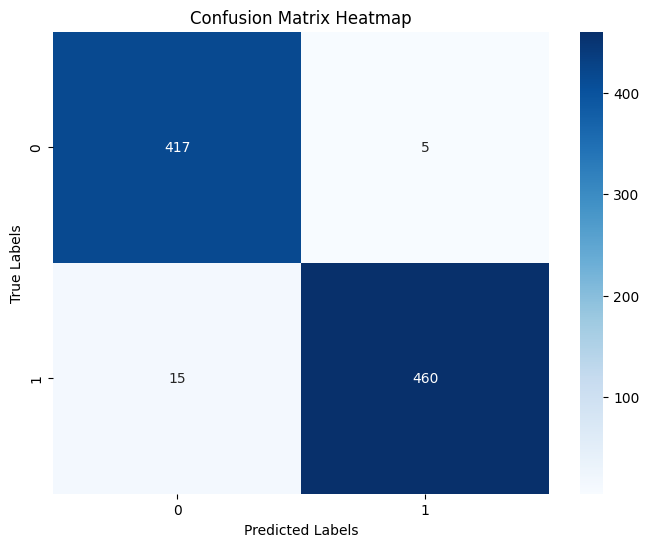

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.2f}")
print("-----------------------------------------------------")
print(classification_report(y_test, y_pred))

print("\nBest Model:")
print(f"Naive Bayes with Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


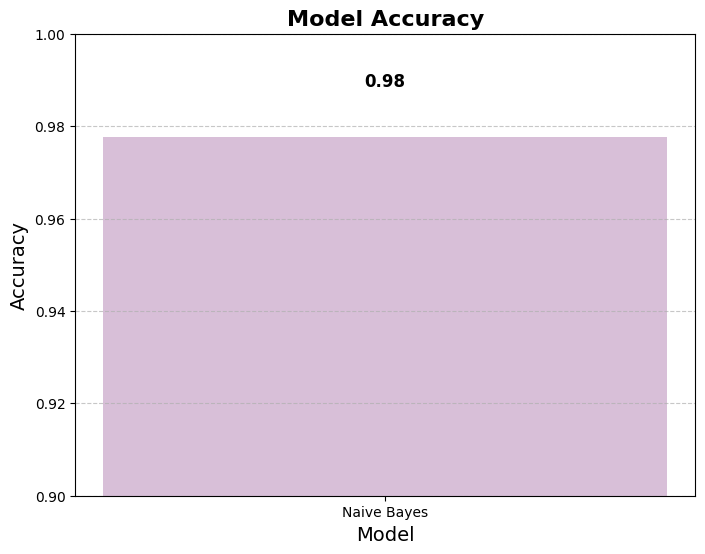

In [ ]:
import matplotlib.pyplot as plt


colors = ['#D8BFD8']

# Create a dictionary with the model name and accuracy
best_results = {"Naive Bayes": accuracy}

# Plotting the accuracy
plt.figure(figsize=(8, 6))
bars = plt.bar(best_results.keys(), best_results.values(), color=colors)
plt.title('Model Accuracy', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)  # You can adjust this range as needed

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
